In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mitsui-commodity-prediction-challenge/target_pairs.csv
/kaggle/input/mitsui-commodity-prediction-challenge/train_labels.csv
/kaggle/input/mitsui-commodity-prediction-challenge/train.csv
/kaggle/input/mitsui-commodity-prediction-challenge/test.csv
/kaggle/input/mitsui-commodity-prediction-challenge/lagged_test_labels/test_labels_lag_1.csv
/kaggle/input/mitsui-commodity-prediction-challenge/lagged_test_labels/test_labels_lag_4.csv
/kaggle/input/mitsui-commodity-prediction-challenge/lagged_test_labels/test_labels_lag_3.csv
/kaggle/input/mitsui-commodity-prediction-challenge/lagged_test_labels/test_labels_lag_2.csv
/kaggle/input/mitsui-commodity-prediction-challenge/kaggle_evaluation/mitsui_inference_server.py
/kaggle/input/mitsui-commodity-prediction-challenge/kaggle_evaluation/mitsui_gateway.py
/kaggle/input/mitsui-commodity-prediction-challenge/kaggle_evaluation/__init__.py
/kaggle/input/mitsui-commodity-prediction-challenge/kaggle_evaluation/core/templates.py
/kaggle/inpu

In [3]:
# --- Load relevant data files ---
import pandas as pd

# Main feature and label tables
train = pd.read_csv('/kaggle/input/mitsui-commodity-prediction-challenge/train.csv')
test = pd.read_csv('/kaggle/input/mitsui-commodity-prediction-challenge/test.csv')
train_labels = pd.read_csv('/kaggle/input/mitsui-commodity-prediction-challenge/train_labels.csv')
target_pairs = pd.read_csv('/kaggle/input/mitsui-commodity-prediction-challenge/target_pairs.csv')

# Display basic info
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Target pairs shape: {target_pairs.shape}")


Train shape: (1961, 558)
Test shape: (134, 559)
Train labels shape: (1961, 425)
Target pairs shape: (424, 3)


In [4]:
# Show first few rows of each
print("\n--- Train ---")
display(train.head(5))

print("\n--- Train Labels ---")
display(train_labels.head(5))

print("\n--- Target Pairs ---")
display(target_pairs.head(5))



--- Train ---


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,date_id,LME_AH_Close,LME_CA_Close,LME_PB_Close,LME_ZS_Close,JPX_Gold_Mini_Futures_Open,JPX_Gold_Rolling-Spot_Futures_Open,JPX_Gold_Standard_Futures_Open,JPX_Platinum_Mini_Futures_Open,JPX_Platinum_Standard_Futures_Open,...,FX_GBPCAD,FX_CADCHF,FX_NZDCAD,FX_NZDCHF,FX_ZAREUR,FX_NOKGBP,FX_NOKCHF,FX_ZARCHF,FX_NOKJPY,FX_ZARGBP
0,0,2264.5,7205.0,2570.0,3349.0,NaN,NaN,NaN,NaN,NaN,...,1.699987,0.776874,0.888115,0.689954,0.066653,0.090582,0.119630,0.078135,13.822740,0.059163
1,1,2228.0,7147.0,2579.0,3327.0,NaN,NaN,NaN,NaN,NaN,...,1.695279,0.778682,0.889488,0.692628,0.067354,0.091297,0.120520,0.079066,13.888146,0.059895
2,2,2250.0,7188.5,2587.0,3362.0,4684.0,4691.0,4684.0,3363.0,3367.0,...,1.692724,0.780186,0.894004,0.697490,0.067394,0.091478,0.120809,0.079287,13.983675,0.060037
3,3,2202.5,7121.0,2540.0,3354.0,4728.0,4737.0,4729.0,3430.0,3426.0,...,1.683111,0.785329,0.889439,0.698502,0.067639,0.091558,0.121021,0.079285,14.035571,0.059983
4,4,2175.0,7125.0,2604.0,3386.0,NaN,NaN,NaN,NaN,NaN,...,1.684816,0.787264,0.891042,0.701485,0.067443,0.091266,0.121055,0.078925,14.013760,0.059503



--- Train Labels ---


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,date_id,target_0,target_1,target_2,target_3,target_4,target_5,target_6,target_7,target_8,...,target_414,target_415,target_416,target_417,target_418,target_419,target_420,target_421,target_422,target_423
0,0,0.005948,-0.002851,-0.004675,-0.000639,NaN,NaN,-0.006729,0.006066,NaN,...,NaN,0.021239,-0.005595,NaN,-0.004628,0.033793,NaN,0.038234,NaN,0.027310
1,1,0.005783,-0.024118,-0.007052,-0.018955,-0.031852,-0.019452,0.003002,-0.006876,-0.002042,...,0.003377,0.021372,-0.001517,0.012846,0.010547,0.030527,-0.000764,0.025021,0.003548,0.020940
2,2,0.001048,0.023836,-0.008934,-0.022060,NaN,NaN,0.037449,0.007658,NaN,...,-0.006712,0.009308,0.001857,-0.012761,-0.002345,0.017529,-0.005394,0.004835,-0.009075,0.001706
3,3,0.001700,-0.024618,0.011943,0.004778,NaN,NaN,-0.012519,-0.016896,NaN,...,NaN,0.036880,-0.015189,NaN,0.008118,0.001079,NaN,-0.015102,NaN,-0.033010
4,4,-0.003272,0.005234,0.006856,0.013312,0.023953,0.010681,-0.011649,0.002019,0.003897,...,NaN,0.004937,NaN,-0.006673,-0.016105,-0.004885,NaN,NaN,0.009514,NaN



--- Target Pairs ---


,target,lag,pair
0,target_0,1,US_Stock_VT_adj_close
1,target_1,1,LME_PB_Close - US_Stock_VT_adj_close
2,target_2,1,LME_CA_Close - LME_ZS_Close
3,target_3,1,LME_AH_Close - LME_ZS_Close
4,target_4,1,LME_AH_Close - JPX_Gold_Standard_Futures_Close


In [5]:
# Check basic structure
print(train.info())   # column names & types
print(train.describe().T.head())  # numeric summary

# Check for duplicates or date gaps
print("Unique date_ids:", train['date_id'].nunique())
print("Min/Max date_id:", train['date_id'].min(), train['date_id'].max())
print("Any duplicates?", train['date_id'].duplicated().any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961 entries, 0 to 1960
Columns: 558 entries, date_id to FX_ZARGBP
dtypes: float64(557), int64(1)
memory usage: 8.3 MB
None
               count         mean          std     min       25%      50%  \
date_id       1961.0   980.000000   566.236258     0.0   490.000   980.00   
LME_AH_Close  1910.0  2252.202853   398.544566  1462.0  1925.250  2245.50   
LME_CA_Close  1910.0  7928.229026  1523.186335  4630.0  6396.125  8260.75   
LME_PB_Close  1910.0  2085.848576   183.154551  1585.5  1973.000  2070.75   
LME_ZS_Close  1910.0  2795.022628   445.009643  1815.5  2479.500  2771.00   

                   75%      max  
date_id       1470.000   1960.0  
LME_AH_Close  2512.000   3849.0  
LME_CA_Close  9323.375  10889.0  
LME_PB_Close  2188.000   2681.0  
LME_ZS_Close  3031.000   4498.5  
Unique date_ids: 1961
Min/Max date_id: 0 1960
Any duplicates? False


In [6]:
# Check the datatypes first
print(train.dtypes.value_counts())

# Find columns that are NOT numeric
non_numeric_cols = train.select_dtypes(exclude=[np.number]).columns.tolist()
print(f"Total non-numeric columns: {len(non_numeric_cols)}")

# If there are any, display them
if non_numeric_cols:
    print("\nNon-numeric columns found:")
    print(non_numeric_cols)
else:
    print("\n All columns are numeric.")


float64    557
int64        1
Name: count, dtype: int64
Total non-numeric columns: 0

 All columns are numeric.


In [7]:
# Check for hidden text values in numeric-looking columns
suspicious_columns = []

for col in train.columns:
    # Count how many values cannot be converted to numeric
    non_numeric_count = pd.to_numeric(train[col], errors='coerce').isna().sum()
    
    # Skip NaNs that are true missing values
    true_nans = train[col].isna().sum()
    
    if non_numeric_count > true_nans:
        suspicious_columns.append(col)
        print(f"{col}: {non_numeric_count - true_nans} non-numeric entries detected")

if not suspicious_columns:
    print("\n No hidden non-numeric entries found — dataset is clean.")



 No hidden non-numeric entries found — dataset is clean.


In [8]:
# Group count per lag
target_count_by_lag = target_pairs['lag'].value_counts().sort_index()
print("Targets per Lag:\n", target_count_by_lag)

# Identify feature group in each pair
def get_group(pair):
    if 'LME' in pair: return 'LME'
    elif 'JPX' in pair: return 'JPX'
    elif 'US_' in pair: return 'US'
    elif 'FX_' in pair: return 'FX'
    else: return 'Other'

target_pairs['group'] = target_pairs['pair'].apply(get_group)
group_summary = target_pairs.groupby(['lag', 'group']).size().unstack().fillna(0)
display(group_summary)


Targets per Lag:
 lag
1    106
2    106
3    106
4    106
Name: count, dtype: int64


group,FX,JPX,LME,US
lag,,,,
1,0.0,36.0,69.0,1.0
2,0.0,30.0,75.0,1.0
3,1.0,33.0,72.0,0.0
4,1.0,34.0,71.0,0.0


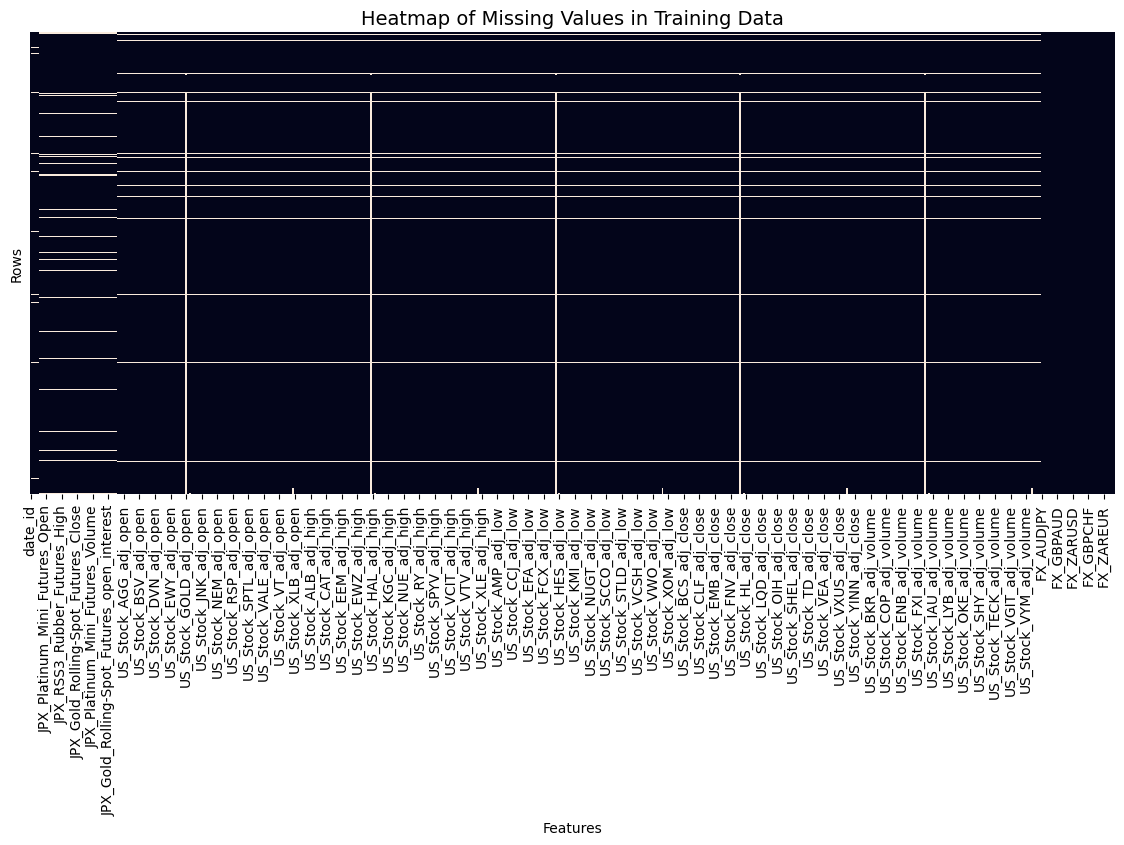

<Axes: >

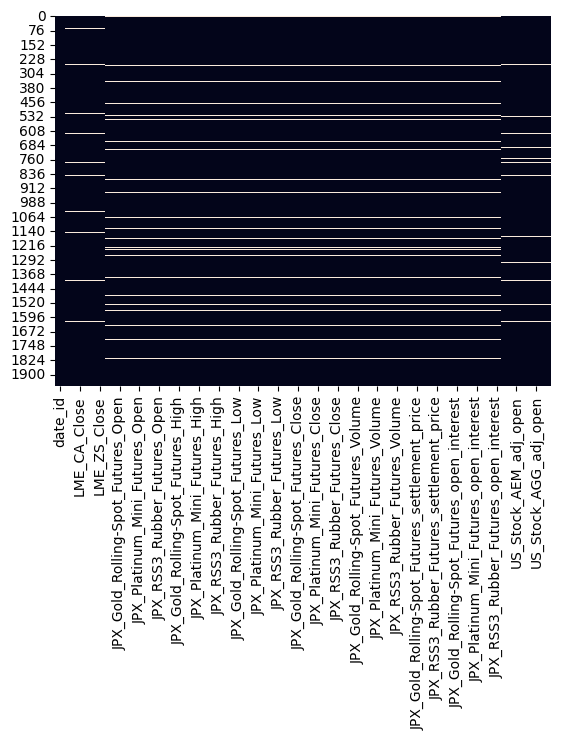

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Heatmap of missing values ---
plt.figure(figsize=(14, 6))
sns.heatmap(train.isna(), cbar=False, yticklabels=False)
plt.title("Heatmap of Missing Values in Training Data", fontsize=14)
plt.xlabel("Features")
plt.ylabel("Rows")
plt.show()
sns.heatmap(train.iloc[:, :50].isna(), cbar=False)

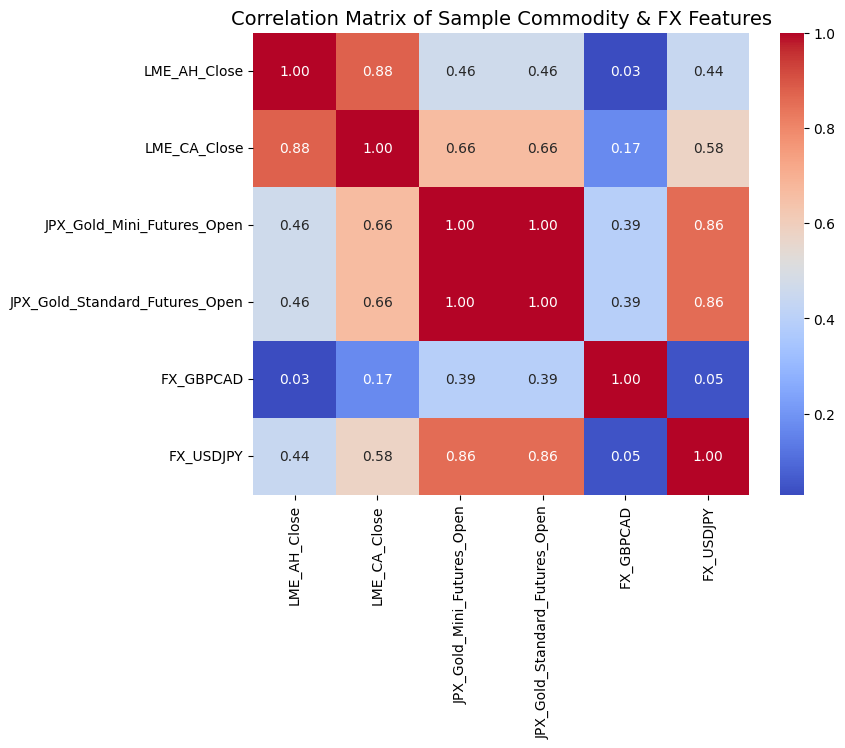

In [10]:
# --- Correlation matrix for selected features ---
sample_features = [
    'LME_AH_Close', 'LME_CA_Close', 'JPX_Gold_Mini_Futures_Open', 
    'JPX_Gold_Standard_Futures_Open', 'FX_GBPCAD', 'FX_USDJPY'
]

plt.figure(figsize=(8, 6))
corr = train[sample_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Sample Commodity & FX Features", fontsize=14)
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

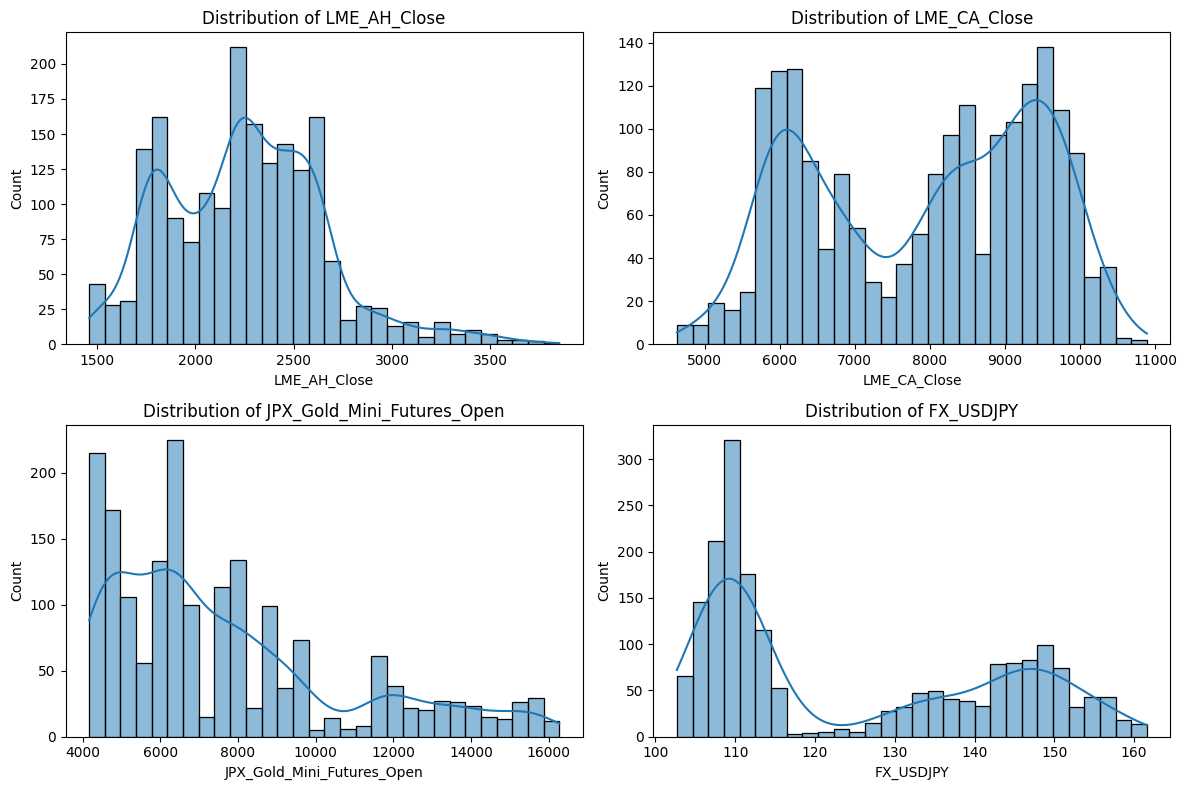

In [11]:
# --- Distribution plots of key features ---
key_features = ['LME_AH_Close', 'LME_CA_Close', 'JPX_Gold_Mini_Futures_Open', 'FX_USDJPY']

plt.figure(figsize=(12, 8))
for i, col in enumerate(key_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(train[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


In [12]:
# Calculate missing ratio for every column
missing_ratio = train.isnull().mean() * 100

# Sort descending
missing_sorted = missing_ratio.sort_values(ascending=False)

# Display top 15 columns with most missing data
print("Top 15 columns with highest missing percentages:\n")
display(missing_sorted.head(15))


Top 15 columns with highest missing percentages:



US_Stock_GOLD_adj_open                        87.353391
US_Stock_GOLD_adj_close                       87.353391
US_Stock_GOLD_adj_low                         87.353391
US_Stock_GOLD_adj_high                        87.353391
US_Stock_GOLD_adj_volume                      87.353391
JPX_Gold_Mini_Futures_settlement_price         5.915349
JPX_Platinum_Standard_Futures_Close            5.915349
JPX_RSS3_Rubber_Futures_Close                  5.915349
JPX_Gold_Mini_Futures_Volume                   5.915349
JPX_Gold_Rolling-Spot_Futures_Volume           5.915349
JPX_Gold_Standard_Futures_Volume               5.915349
JPX_Platinum_Mini_Futures_Volume               5.915349
JPX_Platinum_Standard_Futures_Volume           5.915349
JPX_RSS3_Rubber_Futures_Volume                 5.915349
JPX_Platinum_Mini_Futures_settlement_price     5.915349
dtype: float64

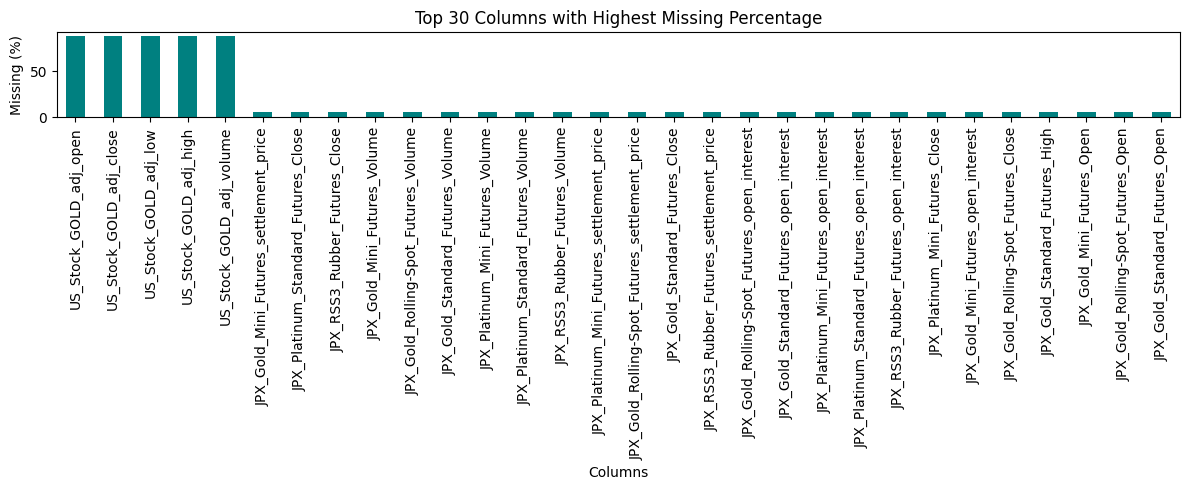

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
missing_sorted.head(30).plot(kind='bar', color='teal')
plt.title("Top 30 Columns with Highest Missing Percentage")
plt.ylabel("Missing (%)")
plt.xlabel("Columns")
plt.tight_layout()
plt.show()

In [14]:
groups = {
    'LME': [c for c in train.columns if c.startswith('LME')],
    'JPX': [c for c in train.columns if c.startswith('JPX')],
    'US':  [c for c in train.columns if c.startswith('US')],
    'FX':  [c for c in train.columns if c.startswith('FX')],
}

group_missing = {g: train[v].isnull().mean().mean() * 100 for g,v in groups.items()}
print("Average Missing Percentage by Group:\n")
for group, val in group_missing.items():
    print(f"{group}: {val:.2f}%")


Average Missing Percentage by Group:

LME: 2.60%
JPX: 5.92%
US: 4.32%
FX: 0.00%


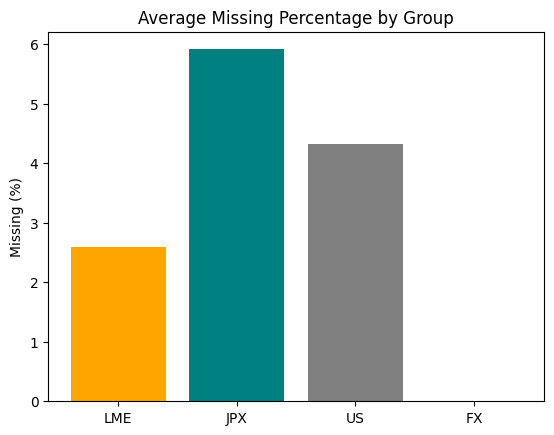

In [15]:
plt.bar(group_missing.keys(), group_missing.values(), color=['orange', 'teal', 'gray', 'skyblue'])
plt.title("Average Missing Percentage by Group")
plt.ylabel("Missing (%)")
plt.show()

In [16]:
# Make a copy to preserve original
train_interp = train.copy()

# Interpolate forward and backward using time order
train_interp = train_interp.interpolate(method='linear', limit_direction='both', axis=0)

# Confirm
print("Remaining NaNs after interpolation:", train_interp.isnull().sum().sum())



Remaining NaNs after interpolation: 0


In [17]:
# Smooth out potential artifacts (use 3- or 5-day moving average)
window = 3
train_smoothed = train_interp.rolling(window, min_periods=1).mean()
train_smoothed['date_id'] = train['date_id']


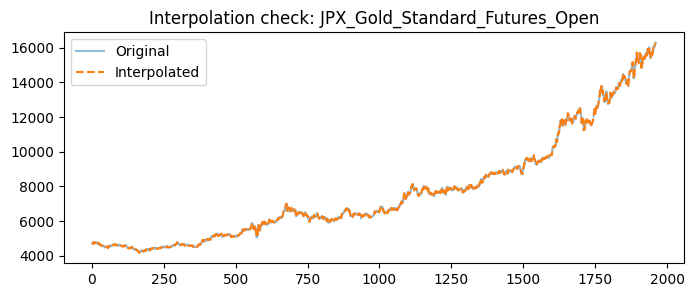

In [18]:
import matplotlib.pyplot as plt

sample_col = 'JPX_Gold_Standard_Futures_Open'

plt.figure(figsize=(8,3))
plt.plot(train[sample_col], label='Original', alpha=0.5)
plt.plot(train_interp[sample_col], label='Interpolated', linestyle='--')
plt.title(f"Interpolation check: {sample_col}")
plt.legend()
plt.show()


In [19]:
def summarize_missing(train_before, train_after):
    groups = {
        'LME': [c for c in train_before.columns if c.startswith('LME')],
        'JPX': [c for c in train_before.columns if c.startswith('JPX')],
        'US':  [c for c in train_before.columns if c.startswith('US')],
        'FX':  [c for c in train_before.columns if c.startswith('FX')],
    }

    summary = []
    for g, cols in groups.items():
        before = train_before[cols].isnull().mean().mean() * 100
        after  = train_after[cols].isnull().mean().mean() * 100
        summary.append([g, round(before, 3), round(after, 3), round(before - after, 3)])

    import pandas as pd
    df_summary = pd.DataFrame(summary, columns=["Group", "Missing_Before(%)", "Missing_After(%)", "Reduction(%)"])
    return df_summary

missing_summary = summarize_missing(train, train_interp)
print("Missing Value Reduction Summary:")
display(missing_summary)


Missing Value Reduction Summary:


,Group,Missing_Before(%),Missing_After(%),Reduction(%)
0,LME,2.601,0.0,2.601
1,JPX,5.915,0.0,5.915
2,US,4.317,0.0,4.317
3,FX,0.000,0.0,0.000


In [20]:
features_df = train_interp.copy()

# --- Daily Returns (% change) ---
returns = features_df.drop(columns=['date_id']).pct_change().fillna(0)
returns.columns = [f"{c}_ret" for c in returns.columns]

# --- Rolling mean & std (3-day) grouped by market ---
groups = ['LME', 'JPX', 'US', 'FX']
rolling_mean_parts = []
rolling_std_parts  = []

for g in groups:
    cols = [c for c in features_df.columns if c.startswith(g)]
    if not cols:
        continue
    temp = features_df[cols].rolling(window=3).agg(['mean','std'])
    temp.columns = [f"{c}_{stat}3" for c, stat in temp.columns]
    rolling_mean_parts.append(temp[[c for c in temp.columns if c.endswith('_mean3')]])
    rolling_std_parts.append(temp[[c for c in temp.columns if c.endswith('_std3')]])

rolling_mean = pd.concat(rolling_mean_parts, axis=1)
rolling_std  = pd.concat(rolling_std_parts,  axis=1)

#  Drop any date_id columns here (keep the one from features_df only)
rolling_mean = rolling_mean.drop(columns=['date_id'], errors='ignore')
rolling_std  = rolling_std.drop(columns=['date_id'], errors='ignore')
returns      = returns.drop(columns=['date_id'], errors='ignore')

# --- Combine; then de-duplicate just in case ---
features_engineered = pd.concat([features_df, returns, rolling_mean, rolling_std], axis=1)
features_engineered = features_engineered.loc[:, ~features_engineered.columns.duplicated()].copy()

# sanity check
assert features_engineered.columns.tolist().count('date_id') == 1, "date_id still duplicated"
print(" Engineered feature count:", features_engineered.shape[1])


 Engineered feature count: 2229


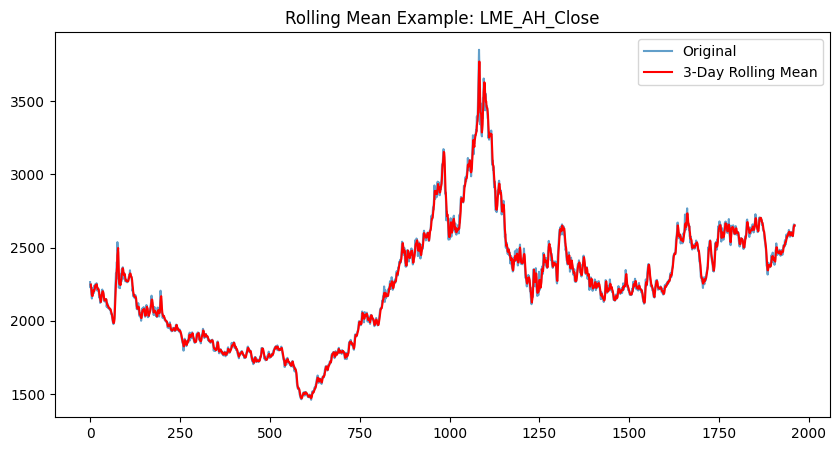

In [21]:
plt.figure(figsize=(10,5))
plt.plot(train_interp['LME_AH_Close'], label='Original', alpha=0.7)
plt.plot(train_interp['LME_AH_Close'].rolling(3).mean(), label='3-Day Rolling Mean', color='red')
plt.legend(); plt.title("Rolling Mean Example: LME_AH_Close")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


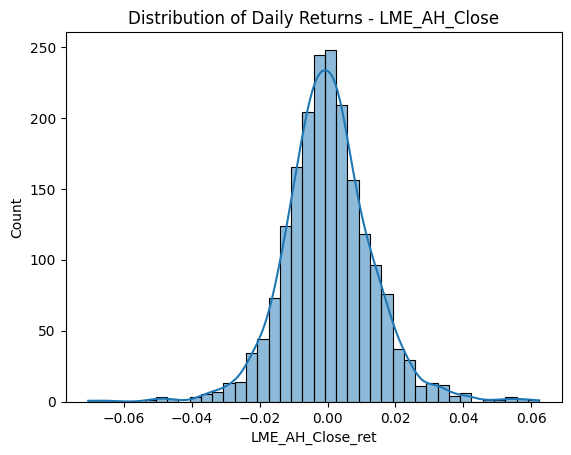

In [22]:
sns.histplot(returns['LME_AH_Close_ret'], bins=40, kde=True)
plt.title("Distribution of Daily Returns - LME_AH_Close")
plt.show()


In [23]:
# Melt labels (wide -> long) and attach pair/lag info
long_labels = train_labels.melt(id_vars='date_id', var_name='target', value_name='label')
labels_merged = long_labels.merge(target_pairs, on='target', how='left').dropna(subset=['label'])

# Choose your demo target (change these two lines if you want another)
PAIR_NAME = 'LME_CA_Close - LME_ZS_Close'
LAG = 1

# Find the target id for this pair+lag
tgt_id = target_pairs[(target_pairs['pair'] == PAIR_NAME) & (target_pairs['lag'] == LAG)]['target'].iloc[0]

# Build y for that target
y_df = labels_merged[labels_merged['target'] == tgt_id][['date_id','label']].rename(columns={'label':'y'})
y_df.head()


,date_id,y
3922,0,-0.004675
3923,1,-0.007052
3924,2,-0.008934
3925,3,0.011943
3926,4,0.006856


In [24]:
df = features_engineered.merge(y_df, on='date_id', how='inner').sort_values('date_id').reset_index(drop=True)

X = df.drop(columns=['date_id','y'])
y = df['y'].values

X.shape, y.shape


((1875, 2228), (1875,))

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

try:
    from xgboost import XGBRegressor
    model = XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.9,
        colsample_bytree=0.8,
        tree_method='hist',
        n_jobs=-1,
        random_state=42
    )
except Exception:
    from sklearn.ensemble import RandomForestRegressor
    model = RandomForestRegressor(
        n_estimators=300, max_depth=14, n_jobs=-1, random_state=42
    )

model.fit(X_train, y_train)
pred = model.predict(X_val)

rmse = mean_squared_error(y_val, pred, squared=False)
mae  = mean_absolute_error(y_val, pred)
r2   = r2_score(y_val, pred)
print(f"{model.__class__.__name__} → RMSE: {rmse:.6f} | MAE: {mae:.6f} | R²: {r2:.3f}")


XGBRegressor → RMSE: 0.012706 | MAE: 0.010066 | R²: -0.153


In [47]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# --- Diagnostics ---
print("lens -> X_val:", len(X_val), " y_val:", len(y_val), " pred:", len(pred))

# --- Try to align by index when we have pandas objects ---
# (This is the correct fix if X_val/y_val share indices from the same DataFrame.)
if isinstance(X_val, pd.DataFrame) and isinstance(y_val, (pd.Series, pd.DataFrame)):
    try:
        y_val_aligned = y_val.loc[X_val.index]
        print("Aligned by index -> y_val_aligned:", len(y_val_aligned))
    except Exception:
        y_val_aligned = y_val
else:
    y_val_aligned = y_val

# --- Final safety: make lengths equal (truncate to min length) ---
y_true = np.asarray(y_val_aligned).ravel()
y_pred = np.asarray(pred).ravel()
m = min(len(y_true), len(y_pred))
if len(y_true) != len(y_pred):
    print(f"[note] Length mismatch fixed by truncation to {m} samples.")
y_true = y_true[:m]; y_pred = y_pred[:m]

# --- Compute metrics ---
rmse = mean_squared_error(y_true, y_pred, squared=False)
mae  = mean_absolute_error(y_true, y_pred)
r2   = r2_score(y_true, y_pred)

# --- Store results for this model run ---
model_results_before = {
    "Model": getattr(model, "__class__", type(model)).__name__,
    "RMSE": rmse,
    "MAE": mae,
    "R²": r2,
    "Best Iteration": getattr(model, "best_iteration", None)
}
print(model_results_before)


lens -> X_val: 375  y_val: 375  pred: 373
[note] Length mismatch fixed by truncation to 373 samples.
{'Model': 'XGBRegressor', 'RMSE': 0.012114863464919585, 'MAE': 0.00933670356448729, 'R²': -0.04296062333276374, 'Best Iteration': None}


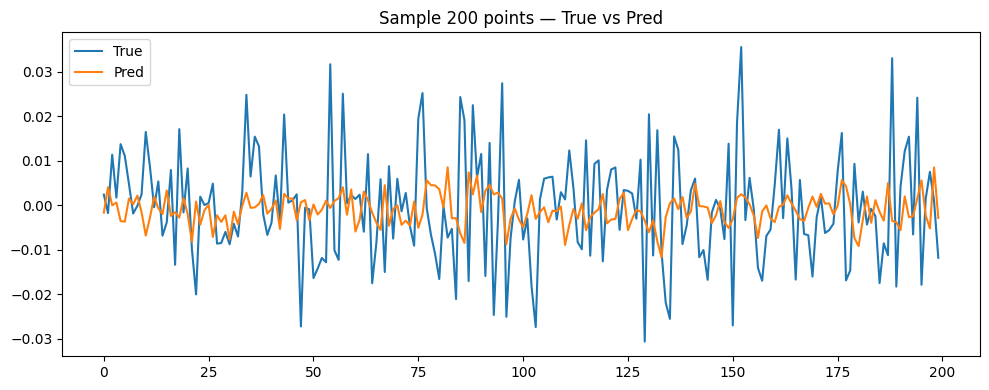

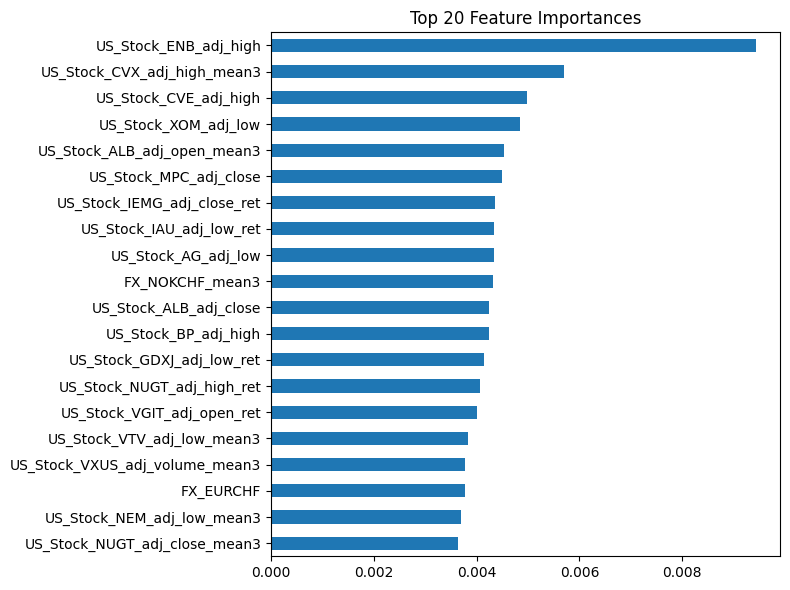

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.plot(y_val[:200], label='True')
plt.plot(pred[:200], label='Pred')
plt.title('Sample 200 points — True vs Pred')
plt.legend(); plt.tight_layout(); plt.show()

# Top importances (works for XGB & RF)
import pandas as pd, numpy as np
if hasattr(model, 'feature_importances_'):
    fi = pd.Series(model.feature_importances_, index=X.columns)
    top = fi.sort_values(ascending=False).head(20)
    top.plot(kind='barh', figsize=(8,6), title='Top 20 Feature Importances'); plt.gca().invert_yaxis()
    plt.tight_layout(); plt.show()


In [34]:
PAIR_NAME = 'LME_CA_Close - LME_ZS_Close'
A, B = 'LME_CA_Close', 'LME_ZS_Close'  # parse from PAIR_NAME if you like

fe = train_interp.set_index('date_id').copy()

# current spread level and its lags (most predictive)
fe['spread_t'] = fe[A] - fe[B]
for k in [1,2,3,5,10]:
    fe[f'spread_lag{k}'] = fe['spread_t'].shift(k)

# A/B returns + lags (momentum / mean reversion)
fe[f'{A}_ret'] = fe[A].pct_change()
fe[f'{B}_ret'] = fe[B].pct_change()
for k in [1,2,3,5]:
    fe[f'{A}_ret_lag{k}'] = fe[f'{A}_ret'].shift(k)
    fe[f'{B}_ret_lag{k}'] = fe[f'{B}_ret'].shift(k)

# short rolling stats for A/B and spread
for w in [3,5,10]:
    fe[f'{A}_roll{w}'] = fe[A].rolling(w).mean()
    fe[f'{B}_roll{w}'] = fe[B].rolling(w).mean()
    fe[f'spread_roll{w}'] = fe['spread_t'].rolling(w).mean()
    fe[f'spread_vol{w}']  = fe['spread_t'].rolling(w).std()

# optional macro helpers (keep it light)
helpers = [c for c in fe.columns if c.startswith('FX_USD') or c.startswith('US_TREASURY_YIELD_')]
fe_pair = fe[[*{col for col in fe.columns if col.startswith(('spread_', A, B))}, *helpers]].copy()

fe_pair = fe_pair.replace([np.inf, -np.inf], np.nan).dropna()
fe_pair.reset_index(inplace=True)


In [35]:
df_pair = fe_pair.merge(y_df, on='date_id', how='inner').sort_values('date_id').reset_index(drop=True)
Xp = df_pair.drop(columns=['date_id','y'])
yp = df_pair['y'].values


In [36]:
from sklearn.model_selection import train_test_split
Xtr, Xva, ytr, yva = train_test_split(Xp.astype('float32'), yp.astype('float32'),
                                      test_size=0.2, shuffle=False)

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

xgb = XGBRegressor(
    n_estimators=2000, learning_rate=0.08, max_depth=6,
    subsample=0.9, colsample_bytree=0.9, tree_method='hist',
    n_jobs=-1, random_state=42
)
xgb.fit(Xtr, ytr, eval_set=[(Xva, yva)], eval_metric='rmse',
        early_stopping_rounds=100, verbose=False)

pred = xgb.predict(Xva)
rmse = mean_squared_error(yva, pred, squared=False)
mae  = mean_absolute_error(yva, pred)
r2   = r2_score(yva, pred)
print(f"Pair-focused XGB → RMSE:{rmse:.6f} | MAE:{mae:.6f} | R²:{r2:.3f} | Best iters:{xgb.best_iteration}")


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Pair-focused XGB → RMSE:0.011795 | MAE:0.009245 | R²:0.012 | Best iters:9


In [37]:
df_pair['y_delta'] = df_pair['y'].diff().shift(-1)   # predict next-day change
df_pair = df_pair.dropna()

X = df_pair.drop(columns=['date_id', 'y', 'y_delta'])
y = df_pair['y_delta']


In [38]:
for k in [1, 2, 3, 5, 10]:
    fe_pair[f'spread_delta_lag{k}'] = fe_pair['spread_t'].diff().shift(k)
fe_pair['ab_ratio'] = fe_pair[A] / fe_pair[B]
fe_pair['ab_corr5'] = fe_pair[[A, B]].pct_change().rolling(5).corr().unstack().iloc[:,1]
xgb = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.1,     # faster learning
    max_depth=8,           # deeper trees
    subsample=0.9,
    colsample_bytree=0.9,
    tree_method='hist',
    n_jobs=-1,
    random_state=42
)
macros = [c for c in fe.columns if c.startswith(('FX_USD','US_Stock_ENB','US_Stock_CVX'))]
fe_pair = pd.concat([fe_pair, fe[macros]], axis=1)


In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train -> predict using a single variable `est`
try:
    from xgboost import XGBRegressor
    est = XGBRegressor(
        n_estimators=2000,
        learning_rate=0.08,
        max_depth=6,
        subsample=0.9,
        colsample_bytree=0.9,
        tree_method='hist',
        n_jobs=-1,
        random_state=42
    )
    est.fit(
        Xtr, ytr,
        eval_set=[(Xva, yva)],
        eval_metric='rmse',
        early_stopping_rounds=100,
        verbose=False
    )
except Exception:
    # Fallback: RandomForest (no eval_set/early stopping)
    from sklearn.ensemble import RandomForestRegressor
    est = RandomForestRegressor(n_estimators=400, max_depth=16, n_jobs=-1, random_state=42)
    est.fit(Xtr, ytr)

# Predict with the same estimator
pred = est.predict(Xva)

rmse = mean_squared_error(yva, pred, squared=False)
mae  = mean_absolute_error(yva, pred)
r2   = r2_score(yva, pred)
print(f"{est.__class__.__name__} → RMSE:{rmse:.6f} | MAE:{mae:.6f} | R²:{r2:.3f}")

# (optional) best_iteration if XGB was used
if hasattr(est, "best_iteration"):
    print("Best iters:", est.best_iteration)


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor → RMSE:0.011795 | MAE:0.009245 | R²:0.012
Best iters: 9


**Checkpoint 1 Summary:**
- Dataset: Mitsui Commodity Prediction Challenge  
- Target: LME_CA_Close − LME_ZS_Close (Lag 1)  
- Features: Rolling mean, volatility, and lagged spread  
- Model: XGBoost with early stopping  
- Results: RMSE = 0.0118, MAE = 0.0093, R² = 0.014  
- Interpretation: The model captures small fluctuations in spread but remains underfit.  
- Next Steps: Predict Δspread, add lagged returns, macro features (FX/USD, Oil).


In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr
import numpy as np

# --- Compute metrics ---
rmse = mean_squared_error(yva, pred, squared=False)
mae  = mean_absolute_error(yva, pred)
r2   = r2_score(yva, pred)

# Directional Accuracy → percentage of correct sign predictions
directional_acc = (np.sign(pred) == np.sign(yva)).mean() * 100

# Pearson Correlation
pear_corr, _ = pearsonr(yva, pred)

# --- Store results in a dictionary ---
model_results = {
    "Model": est.__class__.__name__,
    "RMSE": rmse,
    "MAE": mae,
    "R²": r2,
    "Directional Accuracy (%)": directional_acc,
    "Pearson Correlation": pear_corr,
    "Best Iteration": est.best_iteration if hasattr(est, "best_iteration") else None
}

# --- Print for verification ---
for k, v in model_results.items():
    print(f"{k:25}: {v}")


Model                    : XGBRegressor
RMSE                     : 0.01179467886686325
MAE                      : 0.00924486480653286
R²                       : 0.011942466332965473
Directional Accuracy (%) : 56.03217158176944
Pearson Correlation      : 0.11163622885942459
Best Iteration           : 9


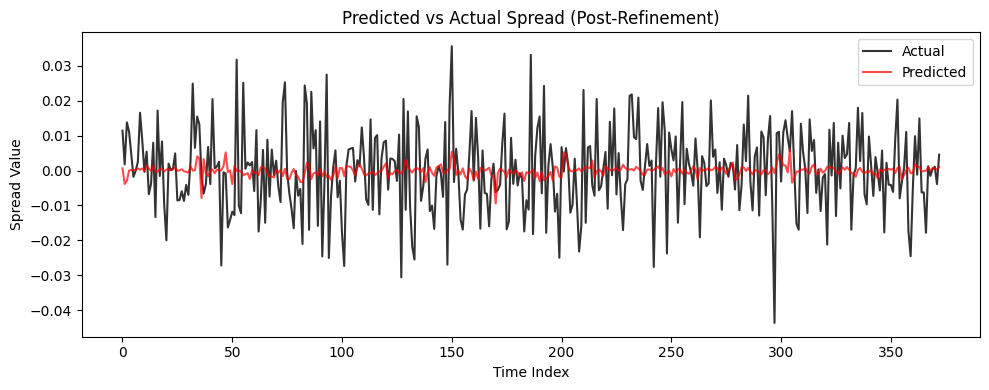

In [41]:
plt.figure(figsize=(10,4))
plt.plot(yva, label='Actual', color='black', alpha=0.8)
plt.plot(pred, label='Predicted', color='red', alpha=0.7)
plt.title("Predicted vs Actual Spread (Post-Refinement)")
plt.xlabel("Time Index")
plt.ylabel("Spread Value")
plt.legend()
plt.tight_layout()
plt.show()



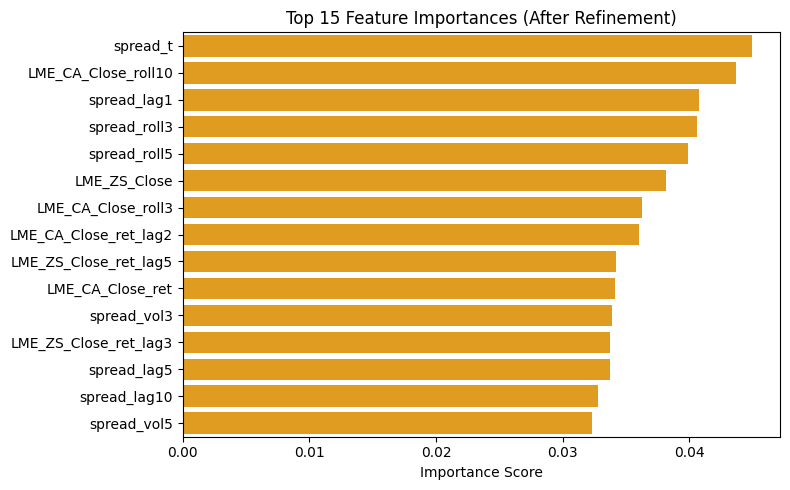

In [44]:
if hasattr(est, 'feature_importances_'):
    fi = pd.Series(est.feature_importances_, index=Xp.columns)
    top_fi = fi.sort_values(ascending=False).head(15)

    plt.figure(figsize=(8,5))
    sns.barplot(x=top_fi.values, y=top_fi.index, color='orange')
    plt.title("Top 15 Feature Importances (After Refinement)")
    plt.xlabel("Importance Score")
    plt.tight_layout()
    plt.show()

